In [1]:
# Lisa loves opera (very simple trained 3-neurotron network)

from neurotron import Token, Toy, Cells, Trainer

In [2]:
# To get help on classes Token, Toy, Cells, Train uncomment the appropriate line below:
#help(Token)
#help(Toy)
#help(Cells)
#help(Train)

In [3]:
# Create a Tokenizer

token = Token({'Lisa':[1,0,0], 'loves':[0,1,0], 'opera':[0,0,1]})
print(token)

{'Lisa': [1, 0, 0], 'loves': [0, 1, 0], 'opera': [0, 0, 1]}


In [4]:
# The Token class provides a method for decoding tokens

print(token.decode([1,0,0]))  # token for 'Lisa'
print(token.decode([0,1,0]))  # token for 'loves'
print(token.decode([0,0,1]))  # token for 'opera' 

Lisa
loves
opera


In [5]:
# if ambiguous patterns are presented to the decoder, the decoder returns a tuple of all 
# tokens which might be represented by the given pattern.

print(token.decode([0,1,1]))  # 'bit pattern union' of tokens 'loves' and 'opera' 

['loves', 'opera']


In [6]:
# Enough about tokens! Let's create a 1 x 3 cell cluster (3 neurotron cells)

m = 1  # number of cluster rows
n = 3  # number of cluster columns
d = 1  # number of detectors per terminal
s = 1  # number of synapses per detector

shape = (m,n,d,s)
cells = Cells(shape,token)

# we have eight (binary) states per cell:
# - U: stimulation state  (violet)
# - Q: excitation state   (blue)
# - D: depression state   (dark gray)
# - B: bursts state       (orange)
# - X: prediction state   (green)
# - Y: activation state   (red)
# - S: spiking state      (white)
# - L: learning state     (yellow)

# initially none of these states are activated

print(cells)


|-|-|-|


In [7]:
# States can be accessed as 1-dimensional arrays or 2-dimensional matrices
# E.g.: cells.X[i,j] = cells.X[k] with k = m*j + i
# Let us set some states:

    # cell [0] or [0,0]

cells.U[0,0] = 1     # cell [0] or [0,0]
cells.Y[0] = 1

    # cell [1] or [0,1]

cells.Q[1] = 1     
cells.D[1] = 1
cells.S[1] = 1
cells.X[1] = 1

    # cell [2] or [0,2]

cells.U[2] = 1
cells.Q[2] = 1      # hides U state in the display
cells.Y[2] = 0
cells.S[2] = 1
cells.L[2] = 1      # hides S state in the display
cells.D[2] = 1
cells.B[2] = 1      # hides D state in the display

# Let us display the cell cluster's states. 

str(cells)

'|UY|QXDS|UQLDBS|'

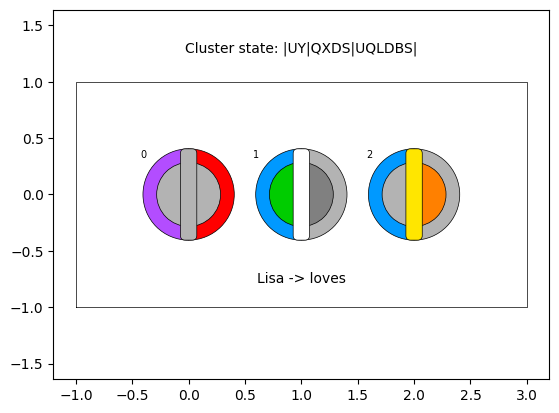

In [8]:
# Now Let us plot the cell cluster's states. 
# Only 5 states per cell are displayed (to present state info as compact as possible). 
# This means that states U,S,D might be potentially hidden when displayed, if states Q,L,B 
# are set (have logical value 1):
# - Q hides U
# - L hides S
# - B hides D
# mind: the state values are not actually over written, it is only a matter of (compact) plotting

cells.plot('Cluster state: '+str(cells))

In [9]:
# Prediction Terminal:
# With cells.map() we see the contens of the prediction terminal's matrices.
# Since the cluster has never be trained, all matrices are zero.

cells.map()

eta: 0.5 , theta: 1 , delta: (0.1, 0.1)
K: +-000/0-+-001/1-+-002/2-+
   |   0   |   0   |   0   |
   +-------+-------+-------+
P: +-000/0-+-001/1-+-002/2-+
   |   0   |   0   |   0   |
   +-------+-------+-------+
W: +-000/0-+-001/1-+-002/2-+
   |   0   |   0   |   0   |
   +-------+-------+-------+


In [10]:
# Training:
# Let us train the network on the pattern 'Lisa loves opera'. To do so we 
# need a trainer object, which we construct by `train = Trainer(cells)`.
# With `train.show()` we can see the current training status,
# which comprises initially only the token list of the tokenizer.

train = Trainer(cells)
train.show()

token:
    [0] Lisa: [1, 0, 0]
    [1] loves: [0, 1, 0]
    [2] opera: [0, 0, 1]
words:
contexts:


In [11]:
# Command `train('','Lisa')` tells the trainer about a word 'Lisa' to be presented
# without current context. In the training status (=> `train.show()`) we see a word
# 'Lisa' to be presented by cell 0 (symbolics [0]). Why cell 0? => because the token for
# 'Lisa' has the left most bit set ([1,0,0]), which corresponds to cell 0.

context = train('','Lisa')
train.show()


# Besides the word 'Lisa' also a context '<Lisa>' has been memorized by the trainer
# and stored in the trainer's context memory

token:
    [0] Lisa: [1, 0, 0]
    [1] loves: [0, 1, 0]
    [2] opera: [0, 0, 1]
words:
    Lisa: ([0], '#0', [0])
contexts:
    <Lisa>:
       #: ([0], '#0', 'Lisa')
       @: ['#0', [0], '0.0']


In [12]:
# The prediction matrices have not changed, since with a single word
# without context no prediction can be concluded. 

cells.map()

eta: 0.5 , theta: 1 , delta: (0.1, 0.1)
K: +-000/0-+-001/1-+-002/2-+
   |   0   |   0   |   0   |
   +-------+-------+-------+
P: +-000/0-+-001/1-+-002/2-+
   |   0   |   0   |   0   |
   +-------+-------+-------+
W: +-000/0-+-001/1-+-002/2-+
   |   0   |   0   |   0   |
   +-------+-------+-------+


In [13]:
# Let us train now the first prediction: Given context <Lisa> we predict
# the next word to be 'loves'.

train('<Lisa>','loves')

# in a similar way we see the new word 'loves' in the trainer's word memory,
# and a new context <Lisa loves>. But there is an additional change: under 
# context <Lisa> we have an entry `loves: (2, '<Lisa loves>', [1]), which is
# a coded representation for a prediction.

train.show()

token:
    [0] Lisa: [1, 0, 0]
    [1] loves: [0, 1, 0]
    [2] opera: [0, 0, 1]
words:
    Lisa: ([0], '#0', [0])
    loves: ([1], '#1', [1])
contexts:
    <Lisa>:
       #: ([0], '#0', 'Lisa')
       @: ['#0', [0], '0.0']
       loves: (1, '<Lisa loves>', [1])
    <Lisa loves>:
       #: ([1], '#1', 'loves')
       @: ['#1', [1], '1.0']


In [14]:
cells.map()

eta: 0.5 , theta: 1 , delta: (0.1, 0.1)
K: +-000/0-+-001/1-+-002/2-+
   |   0   |   0   |   0   |
   +-------+-------+-------+
P: +-000/0-+-001/1-+-002/2-+
   |   0   |   A   |   0   |
   +-------+-------+-------+
W: +-000/0-+-001/1-+-002/2-+
   |   0   |   1   |   0   |
   +-------+-------+-------+


In [15]:
# Let us train now the second prediction: Given context <Lisa loves> we
# predict the next word to be 'opera'.

train('<Lisa loves>','opera')

# in a similar way we see the new word 'opera' in the trainer's word memory,
# and a new context <Lisa loves opera>. And there is an additional change: under 
# context <Lisa loves> we have an entry `opera: (2, '<Lisa loves opera>', [2]), 
# which is the coded representation for a prediction.

train.show()

token:
    [0] Lisa: [1, 0, 0]
    [1] loves: [0, 1, 0]
    [2] opera: [0, 0, 1]
words:
    Lisa: ([0], '#0', [0])
    loves: ([1], '#1', [1])
    opera: ([2], '#1', [1])
contexts:
    <Lisa>:
       #: ([0], '#0', 'Lisa')
       @: ['#0', [0], '0.0']
       loves: (1, '<Lisa loves>', [1])
    <Lisa loves>:
       #: ([1], '#1', 'loves')
       @: ['#1', [1], '1.0']
       opera: (1, '<Lisa loves opera>', [2])
    <Lisa loves opera>:
       #: ([2], '#1', 'opera')
       @: ['#1', [1], '2.0']


In [16]:
cells.map()
print('eta:',cells._predict.eta,
      ', theta:',cells._predict.theta,
      ', delta:',cells._predict.delta)

eta: 0.5 , theta: 1 , delta: (0.1, 0.1)
K: +-000/0-+-001/1-+-002/2-+
   |   0   |   0   |   1   |
   +-------+-------+-------+
P: +-000/0-+-001/1-+-002/2-+
   |   0   |   A   |   A   |
   +-------+-------+-------+
W: +-000/0-+-001/1-+-002/2-+
   |   0   |   1   |   1   |
   +-------+-------+-------+
eta: 0.5 , theta: 1 , delta: (0.1, 0.1)


In [17]:
# There is a shorter way to train the cell cluster.

cells = Cells(shape,token)    # start from scratch
train = Trainer(cells)
train('Lisa loves opera')

# check the trainer memory contents and the matrices of the 
# prediction terminal. All should look the same!

train.show()
cells.map()

token:
    [0] Lisa: [1, 0, 0]
    [1] loves: [0, 1, 0]
    [2] opera: [0, 0, 1]
words:
    Lisa: ([0], '#0', [0])
    loves: ([1], '#1', [1])
    opera: ([2], '#1', [1])
contexts:
    <Lisa>:
       #: ([0], '#0', 'Lisa')
       @: ['#0', [0], '0.0']
       loves: (1, '<Lisa loves>', [1])
    <Lisa loves>:
       #: ([1], '#1', 'loves')
       @: ['#1', [1], '1.0']
       opera: (1, '<Lisa loves opera>', [2])
    <Lisa loves opera>:
       #: ([2], '#1', 'opera')
       @: ['#1', [1], '2.0']
eta: 0.5 , theta: 1 , delta: (0.1, 0.1)
K: +-000/0-+-001/1-+-002/2-+
   |   0   |   0   |   1   |
   +-------+-------+-------+
P: +-000/0-+-001/1-+-002/2-+
   |   0   |   A   |   A   |
   +-------+-------+-------+
W: +-000/0-+-001/1-+-002/2-+
   |   0   |   1   |   1   |
   +-------+-------+-------+


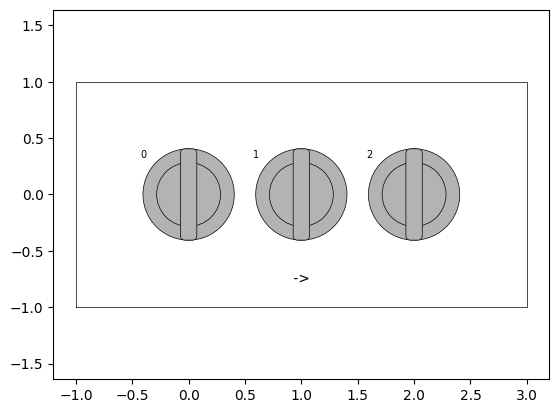

In [18]:
# Check the initial state of the network

cells.plot()

In [19]:
cells.run('Lisa'); 
cells.plot()

nm.sum(E.T) >= self.theta: [] [] 1


TypeError: '>=' not supported between instances of 'list' and 'int'